# A continuación se hará un análisis exploratorio del archivo *Events*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(style="whitegrid")

In [3]:
events = pd.read_csv('./datos/events.csv')

C:\Users\maxi_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# A continuación vamos a analizar los tipos de datos del archivo *'events'* para poder reducir el tamaño del mismo

### Análisis del tipo de datos

Primero que nada, vamos a ver que columnas se tienen y que tipo de dato les asigna Pandas a cada una de ellas.

Podemos ver que el archivo cuenta con **2.494.423 filas** y **22 columnas**, y pesa más de 400 MegaBytes.

In [4]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  object
event_id              int64
ref_type              int64
ref_hash              int64
application_id        int64
attributed            bool
device_countrycode    int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id              object
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             float64
wifi                  object
connection_type       object
ip_address            int64
device_language       float64
dtypes: bool(1), float64(10), int64(6), object(5)
memory usage: 402.0+ MB


In [5]:
events.isnull().sum()

date                        0
event_id                    0
ref_type                    0
ref_hash                    0
application_id              0
attributed                  0
device_countrycode          0
device_os_version     1472357
device_brand          1329460
device_model            87967
device_city           1879725
session_user_agent      11786
trans_id              2494341
user_agent            1102896
event_uuid               5099
carrier               1877989
kind                     5099
device_os             1836756
wifi                  1115551
connection_type       1881960
ip_address                  0
device_language         87819
dtype: int64

Como se puede observar, casi todos los valores para la columna ***trans_id*** son valores nulos, por lo que no vamos a analizar dicha columna ya que no podemos llegar a conclusiones relevantes. Por ende, eliminamos dicha columna para tener un mayor espacio. 

In [6]:
events['trans_id'].value_counts()

{hash}                                                                                                           33
0                                                                                                                16
103430dcab4b60eb4f                                                                                                9
433f38e2c758468ab632dcab7281d4be_Y2NhPTEwLzI1LzIwMTggMTA6Mjk6MjUgUE0mb2ZmZXJJZD0zMzQ1NjQ0NiZhZmZJZD0yMjMyNzUx     7
210a4c5786d249c78bb30237abcac890_Y2NhPTQvMjEvMjAxOCA1OjI2OjM3IFBNJm9mZmVySWQ9MzM0NTY0NDYmYWZmSWQ9MTY2MTgxNQ==     6
1901171053a509cd7317f2c6                                                                                          2
0941bb7b-866f-4d5a-9b85-63e77b27d562                                                                              2
77ca31a9-b0e0-4884-8de8-c2ee74f1cc32                                                                              2
57ff03c8                                                                

In [7]:
events = events.drop(['trans_id'], axis='columns')

Analizando la columna ***device_countrycode*** podemos ver que para todos los datos se obtiene el mismo valor y está determinado por el tipo **int64**. Esto nos permite realizar dos acciones depende el enfoque del análisis que haremos con dicho archivo.
+ Si trabajamos solo con este archivo podemos desisir de dicha columna eliminándola para poder reducir el tamaño de los datos. Cuando lleguemos a una conclusión, sabremos de que se tratan de subastas solo para dicho país.
+ Ahora bien, si trabajamos junto con otro archivo, lo que podemos hacer es cambiarle el tipo de dato a **category**. 

En ambas formas, reduciremos bastante el tamaño del archivo. En éste caso, como estamos realizando un análisis exploratorio de subastas solamente, optaremos por eliminarla.

In [8]:
events['device_countrycode'].value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

In [9]:
events = events.drop(['device_countrycode'], axis='columns')

De una manera bastante parecida podemos tratar a algunas columnas, en ellas no tenemos un solo valor por lo que no es recomendable eliminarlas (salvo que nuestro análisis esté enfocado a otros datos), pero se tienen sólo una cantidad finita (y pequeña) de valores posibles. Por ende, nos servirá cambiar el tipo de **int64** a **category**.
Las columnas son las siguientes: 
+ ***ref_type***
+ ***connection_type***
+ ***device_os***

In [10]:
events['ref_type'].value_counts()

1891515180541284343    1882743
1494519392962156891     611680
Name: ref_type, dtype: int64

In [11]:
events['connection_type'].value_counts()

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

In [12]:
events['device_os'].value_counts()

7.531669e+18    389811
6.941825e+18    260861
2.748831e+18      6110
5.916187e+18       885
Name: device_os, dtype: int64

In [13]:
events['ref_type'] = events['ref_type'].astype('category')
events['connection_type'] = events['connection_type'].astype('category')
events['device_os'] = events['device_os'].astype('category')

Analizando la columna **attributed** podemos ver que de los 2.494.423 eventos registrados, solo 5.099 fueron atribuidos a la empresa Jampp.

In [14]:
events['attributed'].value_counts()

False    2489324
True        5099
Name: attributed, dtype: int64

Todos los valores, no nulos, para la columna **event_uuid** son diferentes. Esto tiene sentido ya que cada evento genera un uuid4. Nos llama la atención que se tengan valores nulos para dicha columna.

In [15]:
events['event_uuid'].value_counts()

cce80d6f-04ff-4299-8e40-f4d04c4bd0d4    1
5b023556-dba3-47e9-a016-183867577f5a    1
f26fcd7d-9745-41ae-bcee-b103f0cd5277    1
c4ff3458-5574-46f5-bdf1-e6959a9fc1e7    1
bba59cbc-22c0-425f-9bf6-5501ef6428f1    1
995c0dc4-f862-4082-9cd7-ed4ccf0afe71    1
c3764a29-02ff-4558-81fb-c35d902aad92    1
72ed4736-05e7-46f5-9be4-837fcbfa506d    1
ffff216c-4856-4546-8ec8-f4832052fcd1    1
7bf5dea7-aabe-4e92-a694-c55aa01f83ef    1
267ad12f-81a6-405d-9d29-3eeebd18b102    1
b3674693-5bc1-40be-bf05-098ebd58829b    1
228ec18f-1b01-4015-a176-75cd8d698ee7    1
d90dee34-105e-4cb7-ac95-a2a775901686    1
b6fbb852-3c95-4161-93de-38a1a70fa4dc    1
b94066e4-7945-4ec9-b740-149e075c96ee    1
2f619461-7841-4ac0-a79e-49e927bcac56    1
31b7c045-80b7-46ba-af24-8b1544b4555d    1
1609b81a-a90b-4bda-a26c-22ddb118c928    1
01be5fa5-e7e6-4c42-865a-fe8135f289cc    1
96e2f788-7c34-4783-9125-7b22f7d679b7    1
07fea725-672e-479e-9148-f9e0feacab93    1
b88e0dc6-33cd-4907-a4ae-a541f70b50b6    1
b6fb7967-cab2-40ad-a2f2-b0dff5fe04

In [16]:
events['event_id'].value_counts()

22     618228
31     417070
161    217846
1      157812
138    100039
162     84898
329     56490
156     53332
33      48581
171     43942
310     42101
155     38465
273     37056
23      35588
21      26228
98      24301
158     23738
272     22788
80      22076
50      20905
81      18622
346     14408
58      13940
51      13455
513     12682
354     11711
133     11074
256     10939
274     10035
60       9456
        ...  
500         1
511         1
532         1
516         1
132         1
520         1
521         1
523         1
575         1
577         1
578         1
579         1
608         1
433         1
597         1
436         1
589         1
588         1
587         1
586         1
585         1
140         1
583         1
581         1
580         1
437         1
443         1
227         1
226         1
584         1
Name: event_id, Length: 568, dtype: int64

Por otra parte, la columna ***wifi*** indica si la instalación se realizó con conexión WiFi y casi la mitad de los valores son nulos, por lo que vamos a cambiarle el tipo también a **category** y agregandole el valor **Unknown** en que de que haya un nulo.

Entonces, los posibles valores serían: True, False o Unknown

In [17]:
events['wifi'].value_counts()

True     930902
False    447970
Name: wifi, dtype: int64

In [18]:
events.fillna({'wifi': 'Unknown'}, inplace = True)
events['wifi'] = events['wifi'].astype('category')

Si analizamos la columna ***ref_hash*** podemos observar que el usuario que más generó eventos lo hizo con una cantidad de 2.913 eventos. Obteniendo una media de entre 12 y 13 eventos generados.

In [19]:
events['ref_hash'].value_counts().describe()

count    196049.000000
mean         12.723467
std          42.792080
min           1.000000
25%           2.000000
50%           4.000000
75%          11.000000
max        2913.000000
Name: ref_hash, dtype: float64

Observando de que aplicación proviene cada eventos, vemos que:
+ Los eventos registrados corresponden a 269 aplicaciones diferentes.
+ La aplicación con más eventos registrados fue la que tiene como id **66** y lo hizo con con 325.696 eventos.
+ La media de los eventos generados por cada aplicación es de entre 9.272 y 9.273 eventos.

In [20]:
events['application_id'].value_counts().head(5)

66     325696
64     259084
145    252431
63     181555
103    137513
Name: application_id, dtype: int64

In [21]:
events['application_id'].value_counts().describe()

count       269.000000
mean       9272.947955
std       36114.506696
min           1.000000
25%          10.000000
50%          95.000000
75%        1670.000000
max      325696.000000
Name: application_id, dtype: float64

Los usuarios que mayor cantidad de eventos generaron lo hicieron a través de un dispositivo cuya marca es **3.083059e+17** (que quintuplica a la siguiente marca). Y el modelo más usado es **2.331947e+18**

In [22]:
events['device_brand'].value_counts().head()

3.083059e+17    579861
3.812621e+18    115538
2.208835e+18    113636
2.987569e+18    107472
2.523246e+18     94672
Name: device_brand, dtype: int64

In [23]:
events['device_model'].value_counts().head()

2.331947e+18    210697
7.787531e+18     74780
9.149036e+18     66279
2.066431e+17     60168
4.445252e+18     56241
Name: device_model, dtype: int64

Por otro lado, la mayor cantidad de dispositivos que generaron eventos provienen de la ciudad con id **3.800080e+18**

In [24]:
events['device_city'].value_counts().head()

3.800080e+18    561876
2.551781e+18     11193
3.258215e+18      4442
8.223209e+18      4393
8.578627e+17      2497
Name: device_city, dtype: int64

Viendo el operador móvil, podemos decir que los dispositivos más frecuentes utilizan al registrado como **2.248157e+17**, por amplia diferencia. 

In [25]:
events['carrier'].value_counts().head()

2.248157e+17    436983
1.179587e+18     80958
7.855224e+18     58478
6.948828e+18     29574
3.570805e+18      3457
Name: carrier, dtype: int64

Analizando la última columna que nos queda por analizar (***date***), podemos ver que se trata de la fecha en que se realizó la installación de una aplicación y que Pandas la interpetró como object.

Para entender y analizar mejor los datos, vamos a dividir dicha columna en ***year, month, day, weekday*** y ***hour***. Para ello primero debemos transformar la columna date al tipo **datetime**.

In [26]:
events['date'] = pd.to_datetime(events['date'])

In [27]:
events['year'] = events['date'].dt.year
events['month'] = events['date'].dt.month
events['day'] = events['date'].dt.day
events['weekday'] = events['date'].apply(lambda x: x.day_name())
events['hour'] = events['date'].dt.hour

#### Ahora bien, vamos a analizar las columnas creadas.

In [28]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 25 columns):
date                  datetime64[ns]
event_id              int64
ref_type              category
ref_hash              int64
application_id        int64
attributed            bool
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             category
wifi                  category
connection_type       category
ip_address            int64
device_language       float64
year                  int64
month                 int64
day                   int64
weekday               object
hour                  int64
dtypes: bool(1), category(4), datetime64[ns](1), float64(9), int64(8), object(2)
memory usage: 392.5+ MB


In [29]:
events['year'].value_counts()

2019    2494423
Name: year, dtype: int64

In [30]:
events['month'].value_counts()

3    2494423
Name: month, dtype: int64

Tanto para la columna ***year*** como para ***month***, podemos ver que cada una solo tiene un valor posible, siendo 2019 el año y 3 para el mes, es decir, que los datos representados en nuetro archivo corresponden al mes de Marzo de 2019. Por lo que podemos eliminar dichas columnas, teniendo en cuenta al final, que el análisis corresponde a dicho período de tiempo

In [31]:
events = events.drop(['year'], axis='columns')
events = events.drop(['month'], axis='columns')

Por otro lado, las columnas ***day*** y ***hour*** son valores númericos pero no es necesario representarlos como un **int64**. Por ende cambiaremos el tipo a **int8** para reducir el tamaño del archivo.

In [32]:
events['day'] = events['day'].astype(np.int8)
events['hour'] = events['hour'].astype(np.int8)

Si analizamos las fechas de los datos presentes en el archivo en cuestión, podemos determinar que corresponden al período que va del día 5 al 13 de Marzo de 2019. En el cual tenemos dos días Miércoles y dos Jueves.

In [33]:
events.groupby('weekday')['day'].value_counts()

weekday    day
Friday     8      285535
Monday     11     268884
Saturday   9      286221
Sunday     10     293091
Thursday   7      253706
Tuesday    12     296665
           5      240549
Wednesday  13     316267
           6      253505
Name: day, dtype: int64

In [34]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 23 columns):
date                  datetime64[ns]
event_id              int64
ref_type              category
ref_hash              int64
application_id        int64
attributed            bool
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             category
wifi                  category
connection_type       category
ip_address            int64
device_language       float64
day                   int8
weekday               object
hour                  int8
dtypes: bool(1), category(4), datetime64[ns](1), float64(9), int64(4), int8(2), object(2)
memory usage: 321.1+ MB


## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

#### Para analizar el tiempo entre eventos para un mismo dispositivo vamos a usar otro DataFrame

Usaremos un DataFrame nuevo solo por el hecho de no estar manipulando las columnas que no nos importan para ésta sección y así reduciremos el tamaño de la información manejada.

In [35]:
#Ordenamos por date sino la fecha posterior no necesariamente va a cumplirse.
events_time = events[['ref_hash','date']].sort_values('date')

Ahora vamos a crear dos nuevas columnas:
+ ***afterward_date*:** que representa la fecha posterior en la que un dispositivo genera nuevamente un evento.
+ ***time_between_dates*:** que indica la diferencia entre *afterward_date* y *date*, es decir, contiene el tiempo que pasa entre dos subastas consecutivas del mismo dispositivo.

In [36]:
events_time['afterward_date'] = events_time.groupby('ref_hash')['date'].apply(lambda valor: valor.shift(-1))

In [37]:
events_time['time_between_dates'] = events_time['afterward_date'] - events_time['date']

Nos quedaremos solo con aquellos en los que el tiempo entre los eventos sea un valor válido, es decir, no nulo.

In [38]:
events_time = events_time.loc[(~(events_time['time_between_dates'].isnull()))]

In [39]:
events_time['time_between_dates'].describe()

count                   2298374
mean     0 days 04:25:02.070639
std      0 days 16:28:50.816179
min             0 days 00:00:00
25%      0 days 00:00:03.612000
50%      0 days 00:00:55.584000
75%      0 days 00:10:21.135250
max      8 days 22:54:58.348000
Name: time_between_dates, dtype: object

+ Podemos ver que nos dicen que el mínimo de tiempo entre dos eventos del mismo usuario es de *0 days 00:00:00*, lo que no tiene mucho sentido, ya que estaría indicando que un mismo dispositivo genera dos eventos distintas al mismo tiempo. Esto puede ocurrir debido a que un mismo evento se haya registrado dos veces (con otro id).
+ Por otro lado, la media es de casi 4 horas y 25 minutos. Y la desviación estándar es de casi 16 horas y media.

In [40]:
events_time['total_minutes'] = events_time['time_between_dates'].apply(lambda x: x/np.timedelta64(1,'m'))

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

### Análisis de datos

#### 1. Temporal

1.1 - Por día

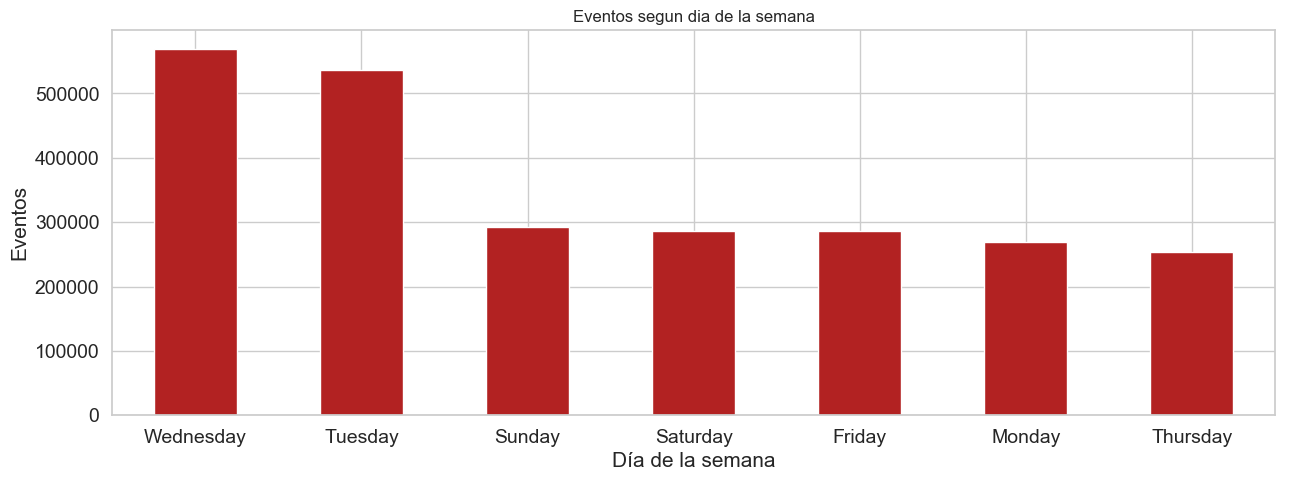

In [41]:
events['weekday'].value_counts().head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=0, color='firebrick')
plt.title('Eventos segun dia de la semana')
plt.ylabel("Eventos", size=15)
plt.xlabel("Día de la semana", size=15)
plt.show()

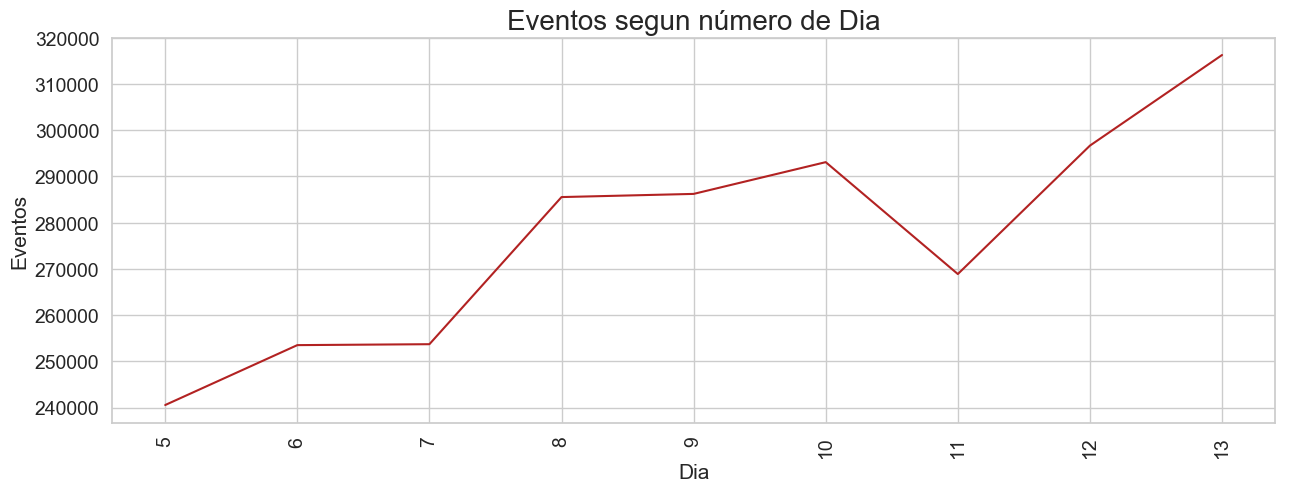

In [42]:
events['day'].value_counts(sort=False).plot(kind='line',figsize=(15,5),fontsize=14,rot=90, color='firebrick')
plt.title('Eventos segun número de Dia',size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("Dia", size=15)
plt.show()

Luego de estos gráficos podemos ver:
+ En cada extremo tenemos los dos extremos del período son donde ocurren la mayor (13-03-19) y menor (05-03-19) cantidad de subastas.
+ Por otra parte, que los días Miércoles y Jueves son aquellos en donde se registraron más eventos.

1.2 - Por hora del día

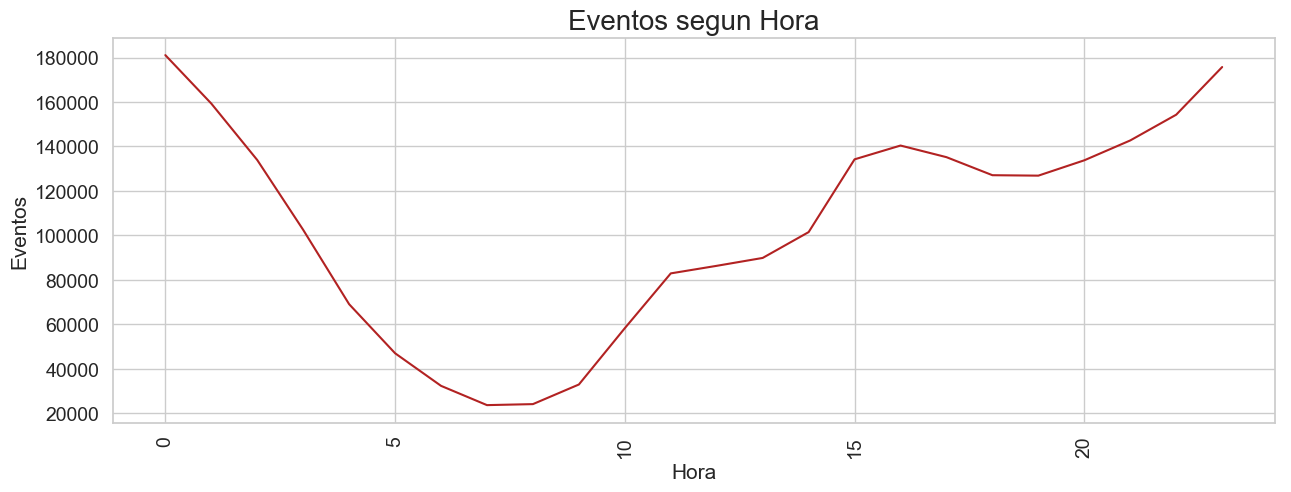

In [43]:
events['hour'].value_counts(sort=False).plot(kind='line',figsize=(15,5),fontsize=14,rot=90, color='firebrick')
plt.title('Eventos segun Hora',size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("Hora", size=15)
plt.show()

Aquí podemos ver como se distribuyen los eventos a lo largo de un día. Se visualiza que la mayor cantidad de eventos registrados por las aplicaciones se da entre fin del día (a partir de las 22hs) hasta la madrugada del día siguiente (2hs). Mientras que entre las 5 y 10 a.m. se dan la menor cantidad de eventos.

#### 2 - Tipo de Evento 

2.1 - Según el id

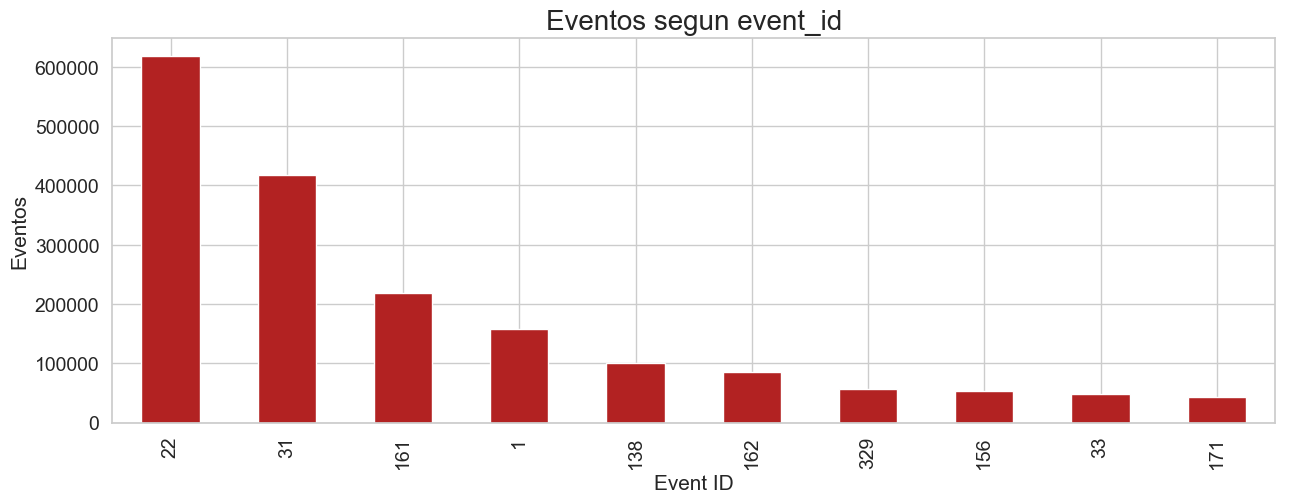

In [44]:
events['event_id'].value_counts().head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90, color='firebrick')
plt.title('Eventos segun event_id', size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("Event ID", size=15)
plt.show()

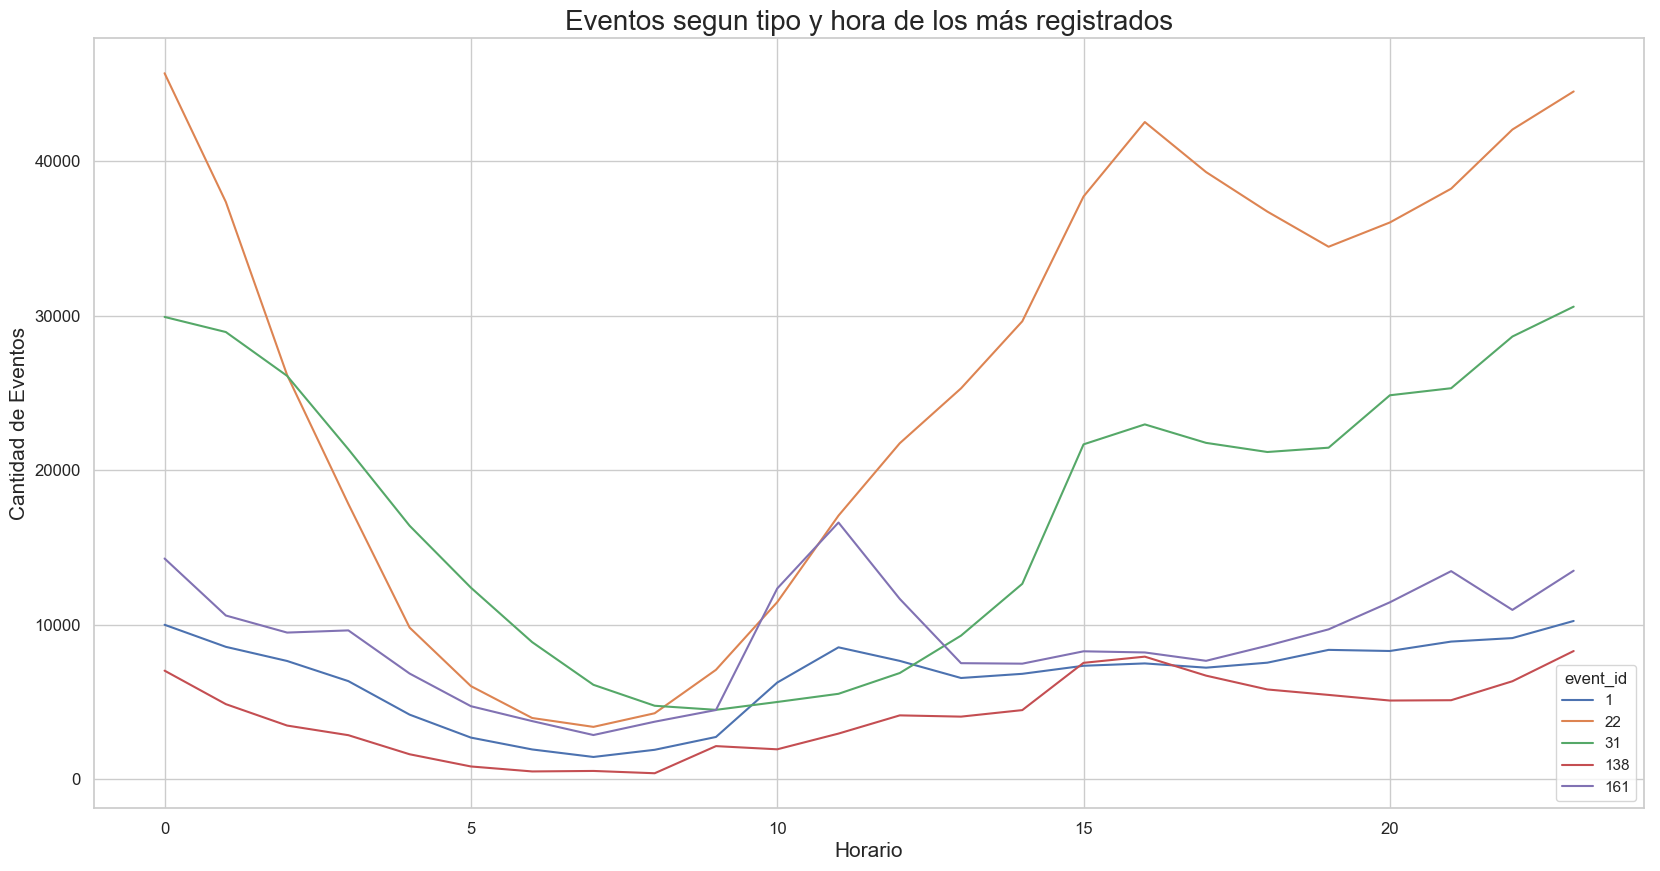

In [45]:
events.loc[(events['event_id']==22)|(events['event_id']==31)|(events['event_id']==161)|(events['event_id']==1)|\
           (events['event_id']==138)|(events['event_id']==31)|(events['event_id']==31)].groupby(['hour','event_id'])\
            ['hour'].count().unstack().plot(kind='line',figsize=(20,10),fontsize=12)
plt.title('Eventos segun tipo y hora de los más registrados', size=20)
plt.ylabel("Cantidad de Eventos", size=15)
plt.xlabel("Horario", size=15)
plt.show()

2.2 - Según kind

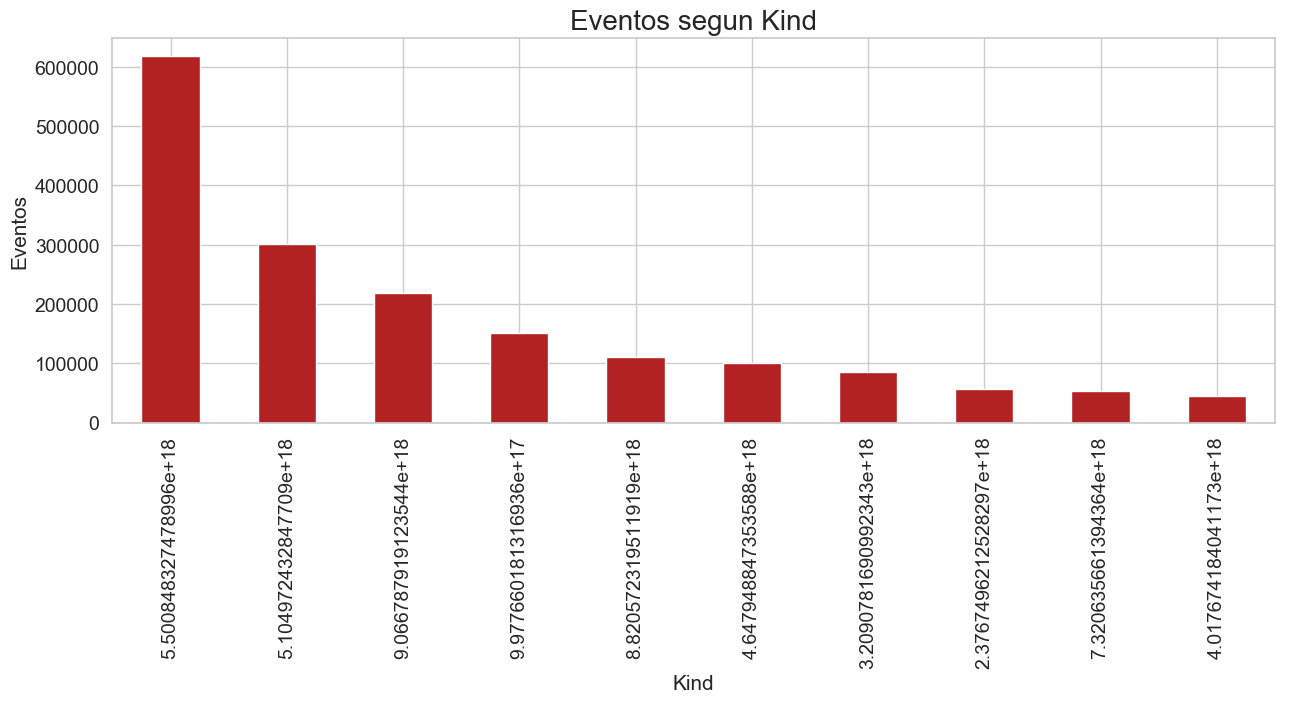

In [46]:
events['kind'].value_counts(sort=True).head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90, color='firebrick')
plt.title('Eventos segun Kind', size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("Kind", size=15)
plt.show()

2.3 - Según User_Agent

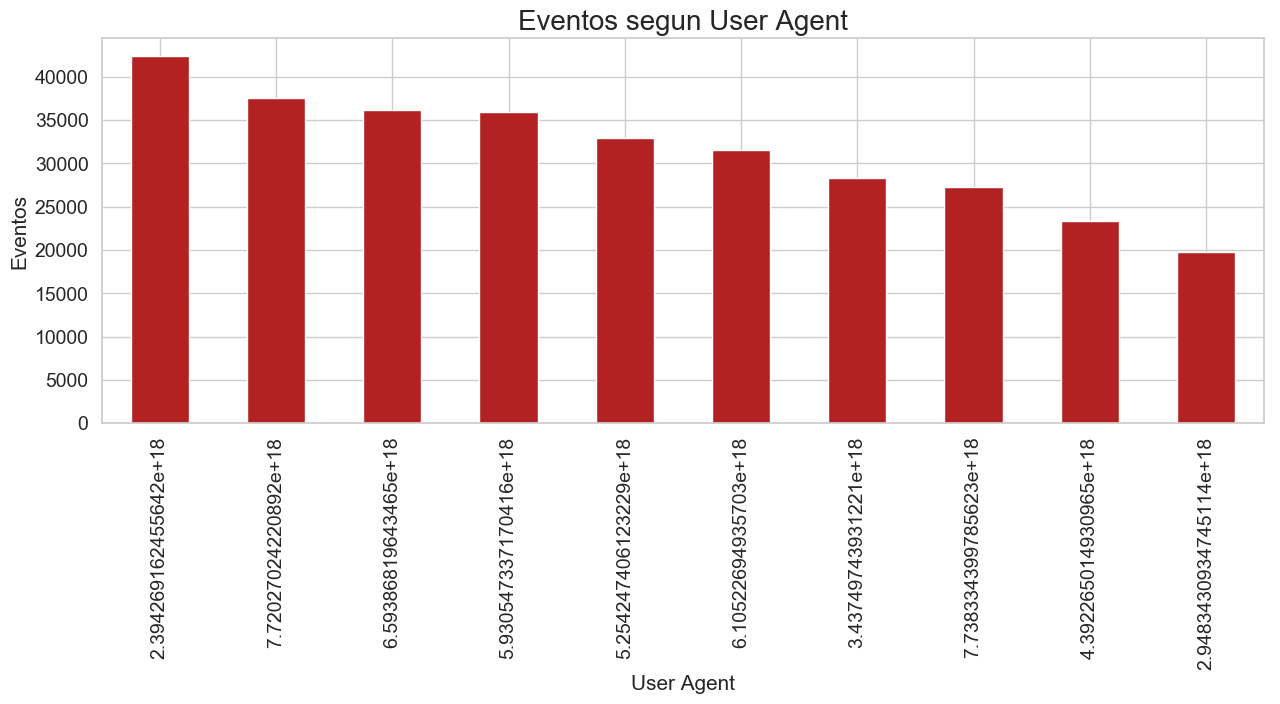

In [47]:
events['user_agent'].value_counts(sort=True).head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90, color='firebrick')
plt.title('Eventos segun User Agent',size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("User Agent", size=15)
plt.show()

2.3 - Según Applicacion ID

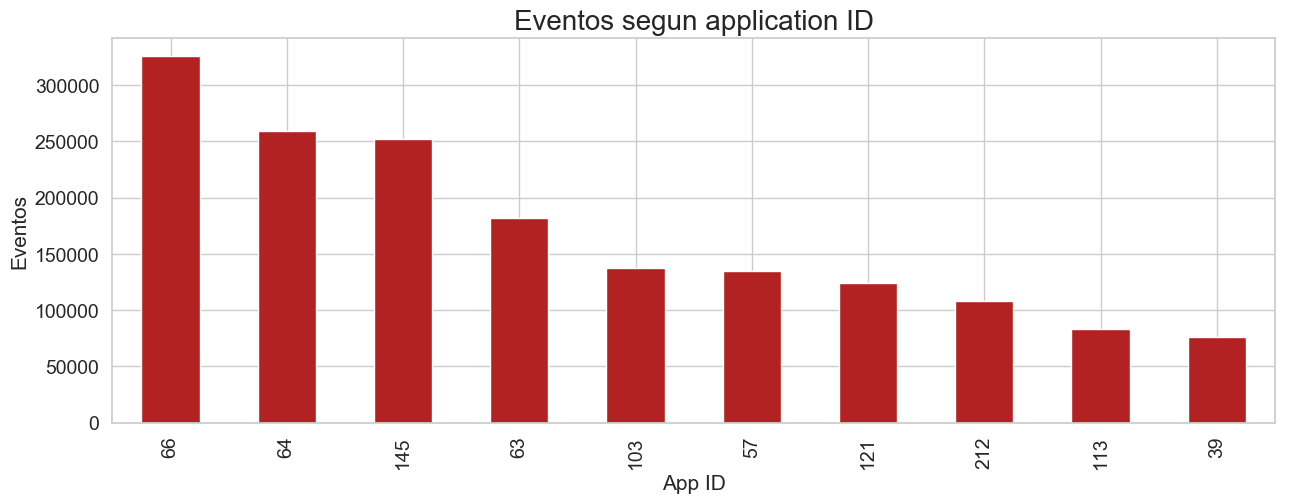

In [48]:
events['application_id'].value_counts(sort=True).head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90, color='firebrick')
plt.title('Eventos segun application ID', size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("App ID", size=15)
plt.show()

2.4 - Según atribución a Jampp

Text(0, 0.5, '')

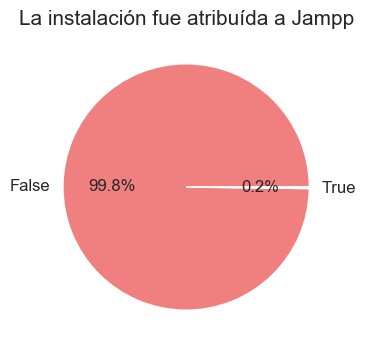

In [49]:
events_attributed = events['attributed'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(4,4),fontsize=12,colors=['lightcoral','lightgreen'],explode=(0, 0))
events_attributed.set_title("La instalación fue atribuída a Jampp",fontsize=15)
events_attributed.set_ylabel("")

#### 3 - Geografía

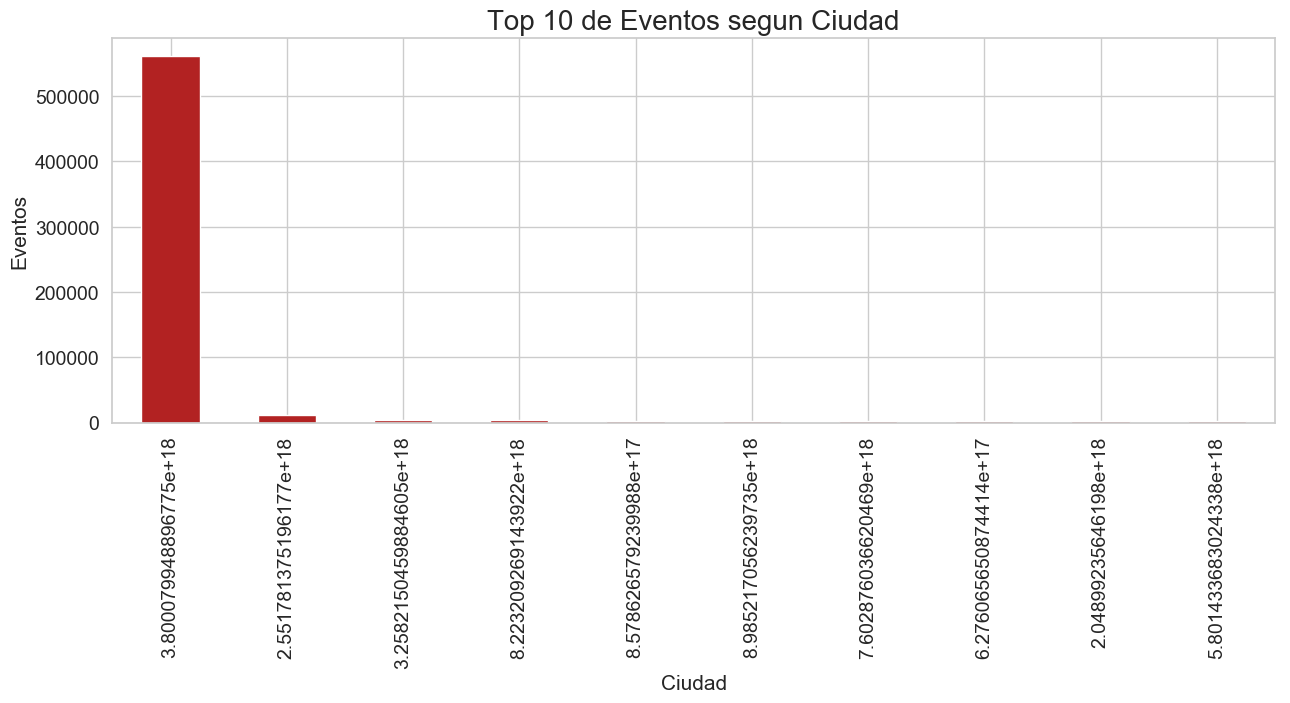

In [50]:
events['device_city'].value_counts(sort=True).head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90, color='firebrick')
plt.title('Top 10 de Eventos segun Ciudad',size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("Ciudad", size=15)
plt.show()

- Podemos ver como la mayoría de los eventos registrados provienen de una sola ciudad de Uruguay.

#### 4 - Dispositivo

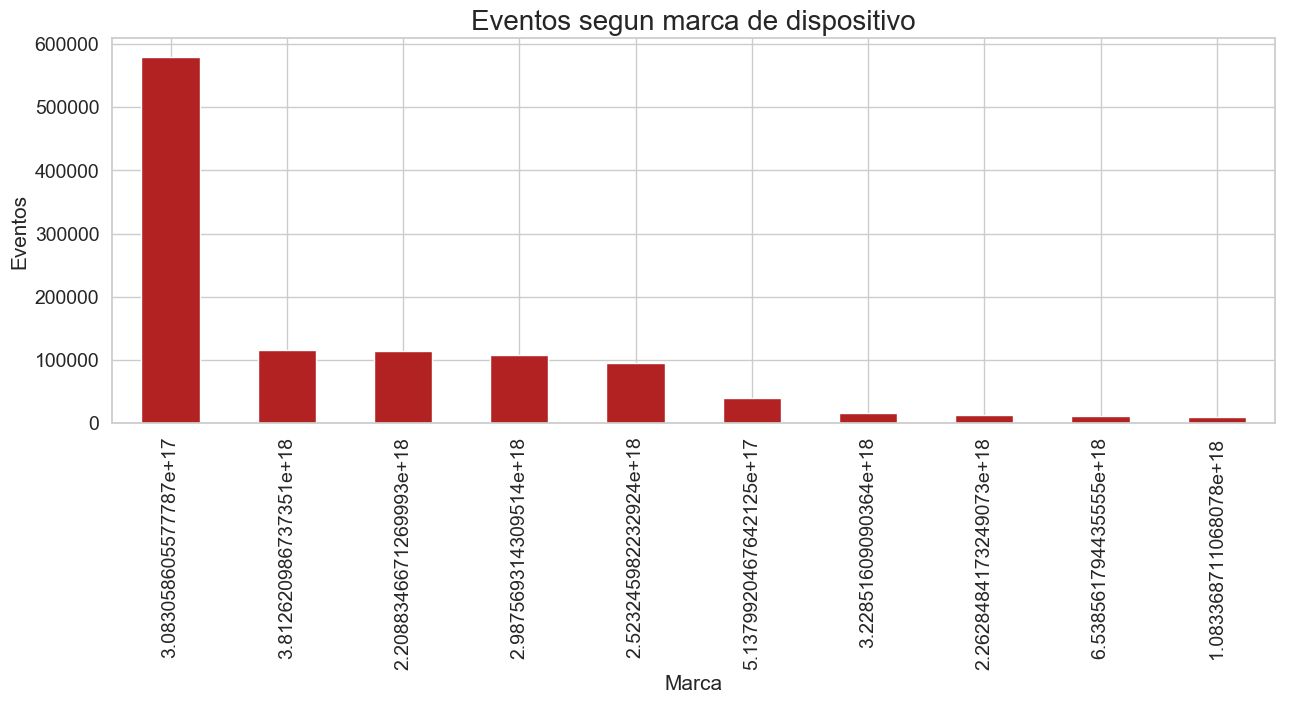

In [51]:
events['device_brand'].value_counts().head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90, color='firebrick')
plt.title('Eventos segun marca de dispositivo',size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("Marca", size=15)
plt.show()

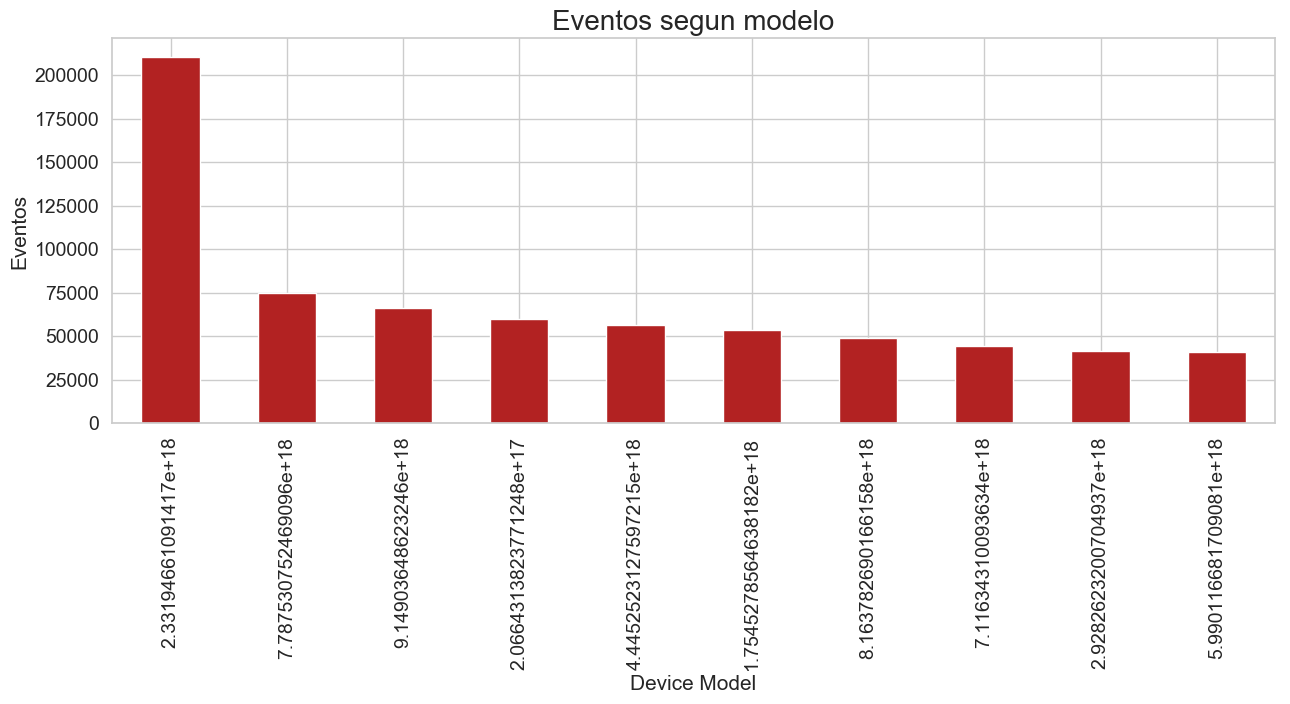

In [52]:
events['device_model'].value_counts(sort=True).head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90,color='firebrick')
plt.title('Eventos segun modelo',size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("Device Model", size=15)
plt.show()

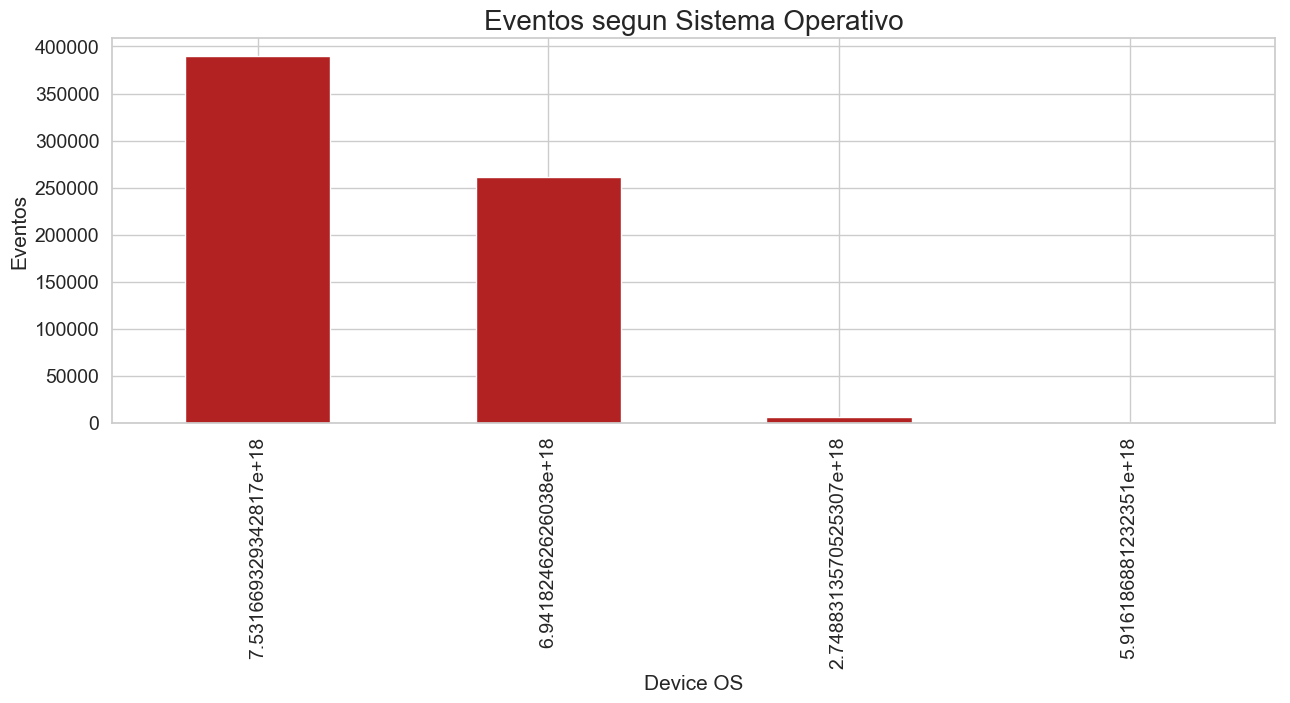

In [53]:
events['device_os'].value_counts(sort=True).head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90,color='firebrick')
plt.title('Eventos segun Sistema Operativo',size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("Device OS", size=15)
plt.show()

#### 5 - Conexión

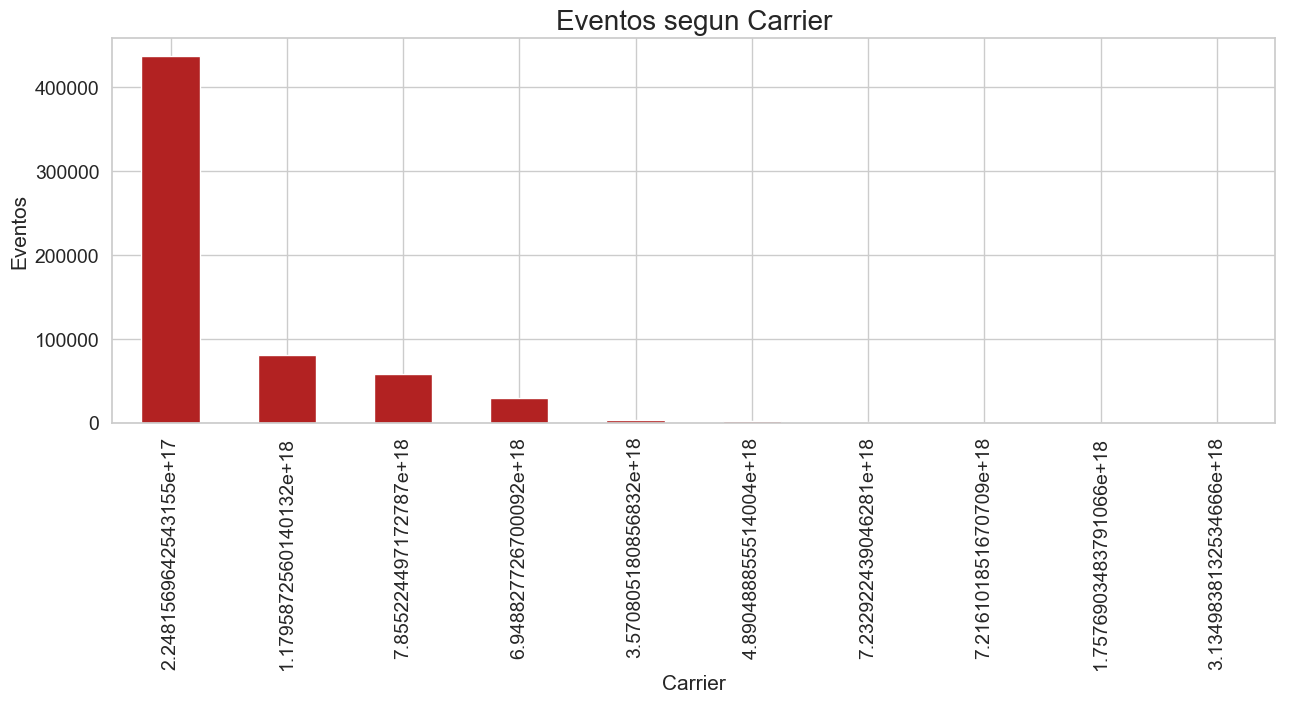

In [54]:
events['carrier'].value_counts(sort=True).head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90, color='firebrick')
plt.title('Eventos segun Carrier', size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("Carrier", size=15)
plt.show()

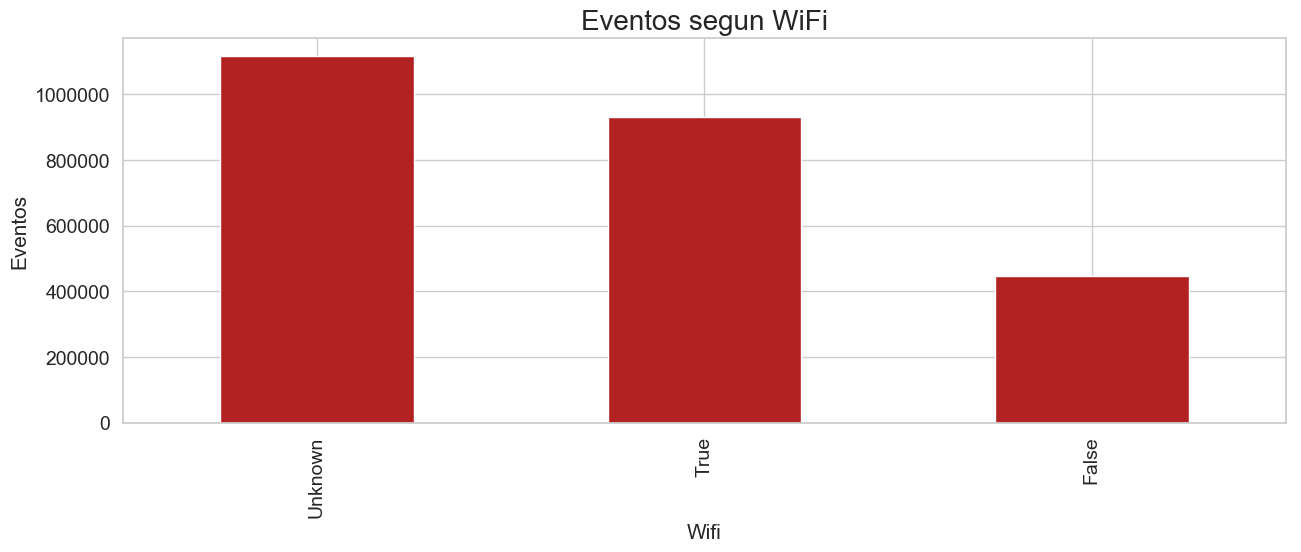

In [55]:
events['wifi'].value_counts(sort=True).head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90, color='firebrick')
plt.title('Eventos segun WiFi',size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("Wifi", size=15)
plt.show()

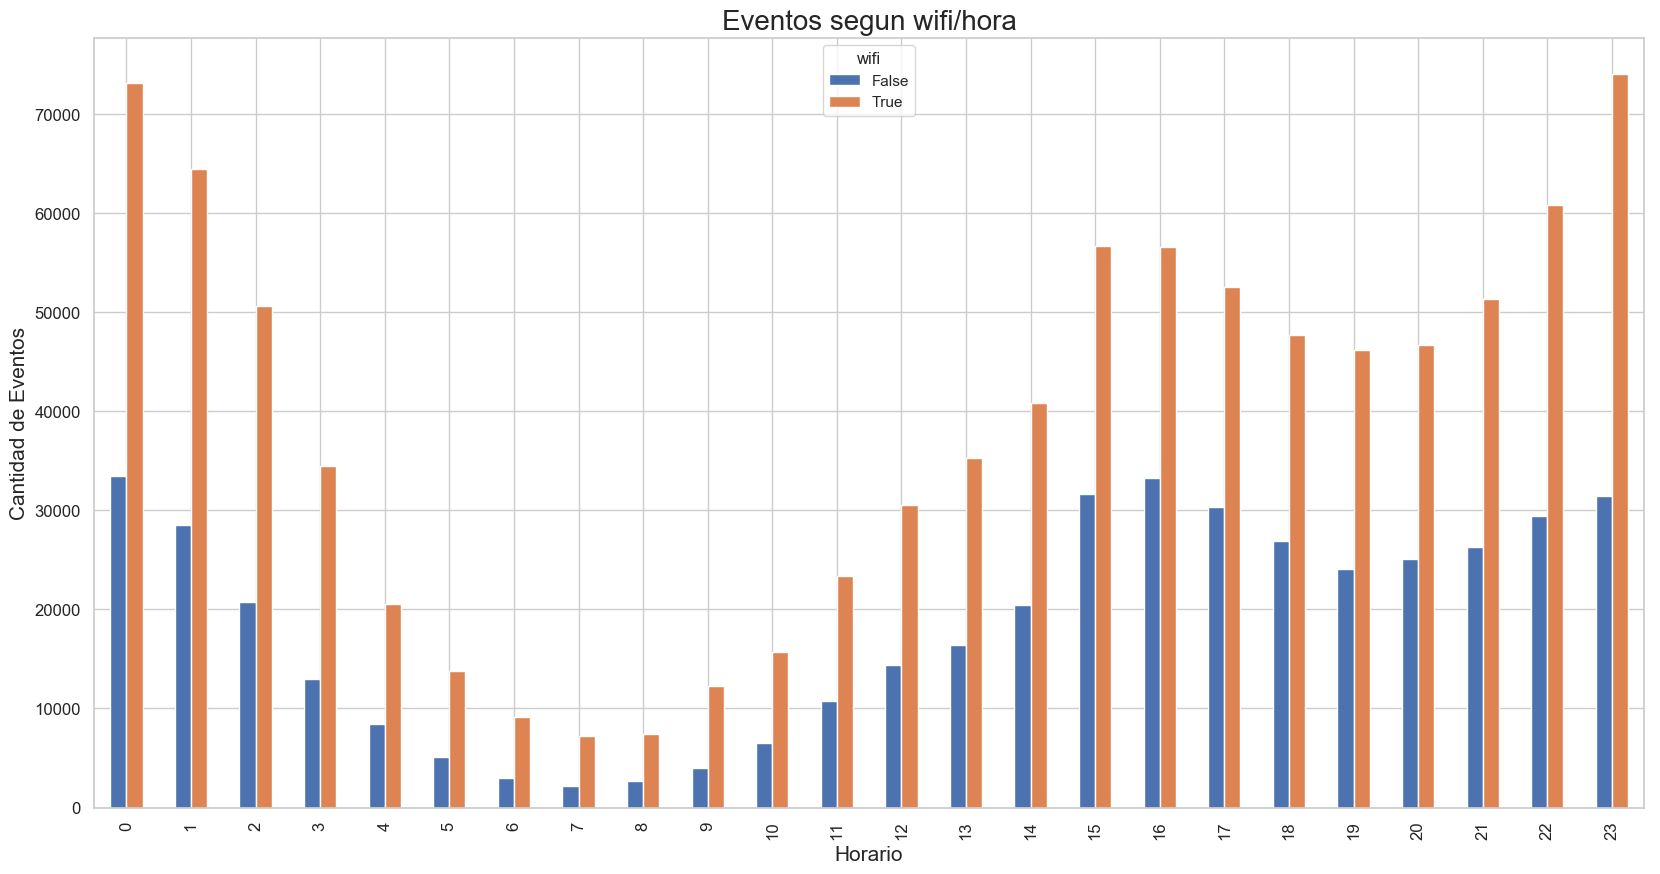

In [56]:
events.loc[(~(events['wifi'] == 'Unknown'))].groupby(['hour','wifi'])['hour'].count().unstack().plot(kind='bar',figsize=(20,10),fontsize=12)
plt.title('Eventos segun wifi/hora', size=20)
plt.ylabel("Cantidad de Eventos", size=15)
plt.xlabel("Horario", size=15)
plt.show()

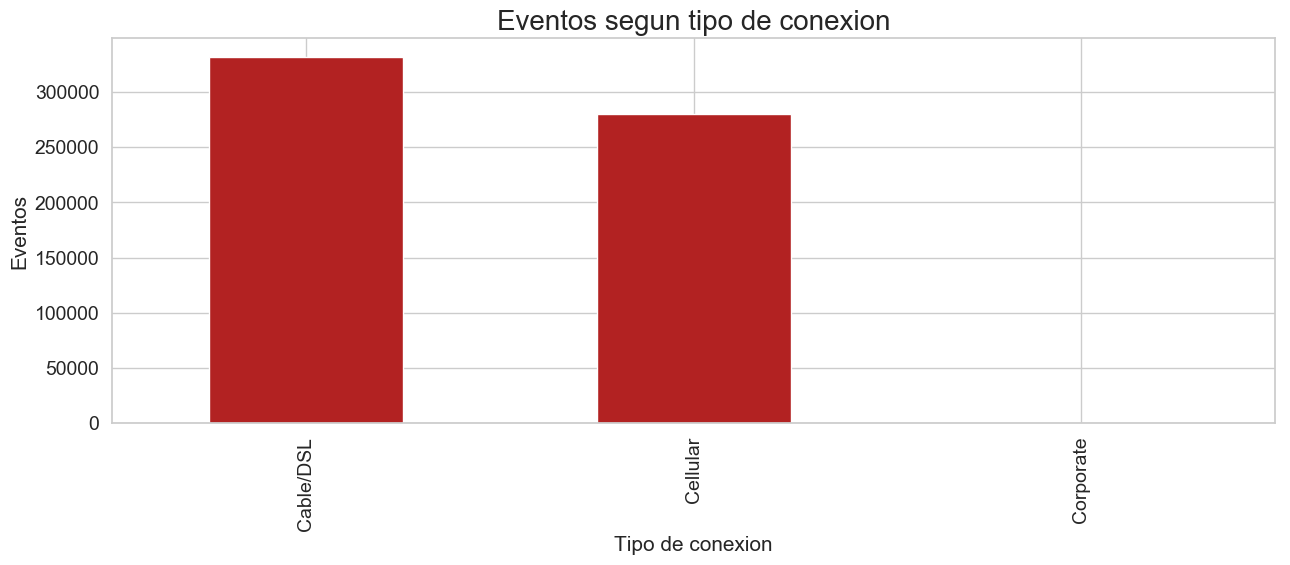

In [57]:
events['connection_type'].value_counts(sort=True).head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90,color='firebrick')
plt.title('Eventos segun tipo de conexion',size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("Tipo de conexion", size=15)
plt.show()

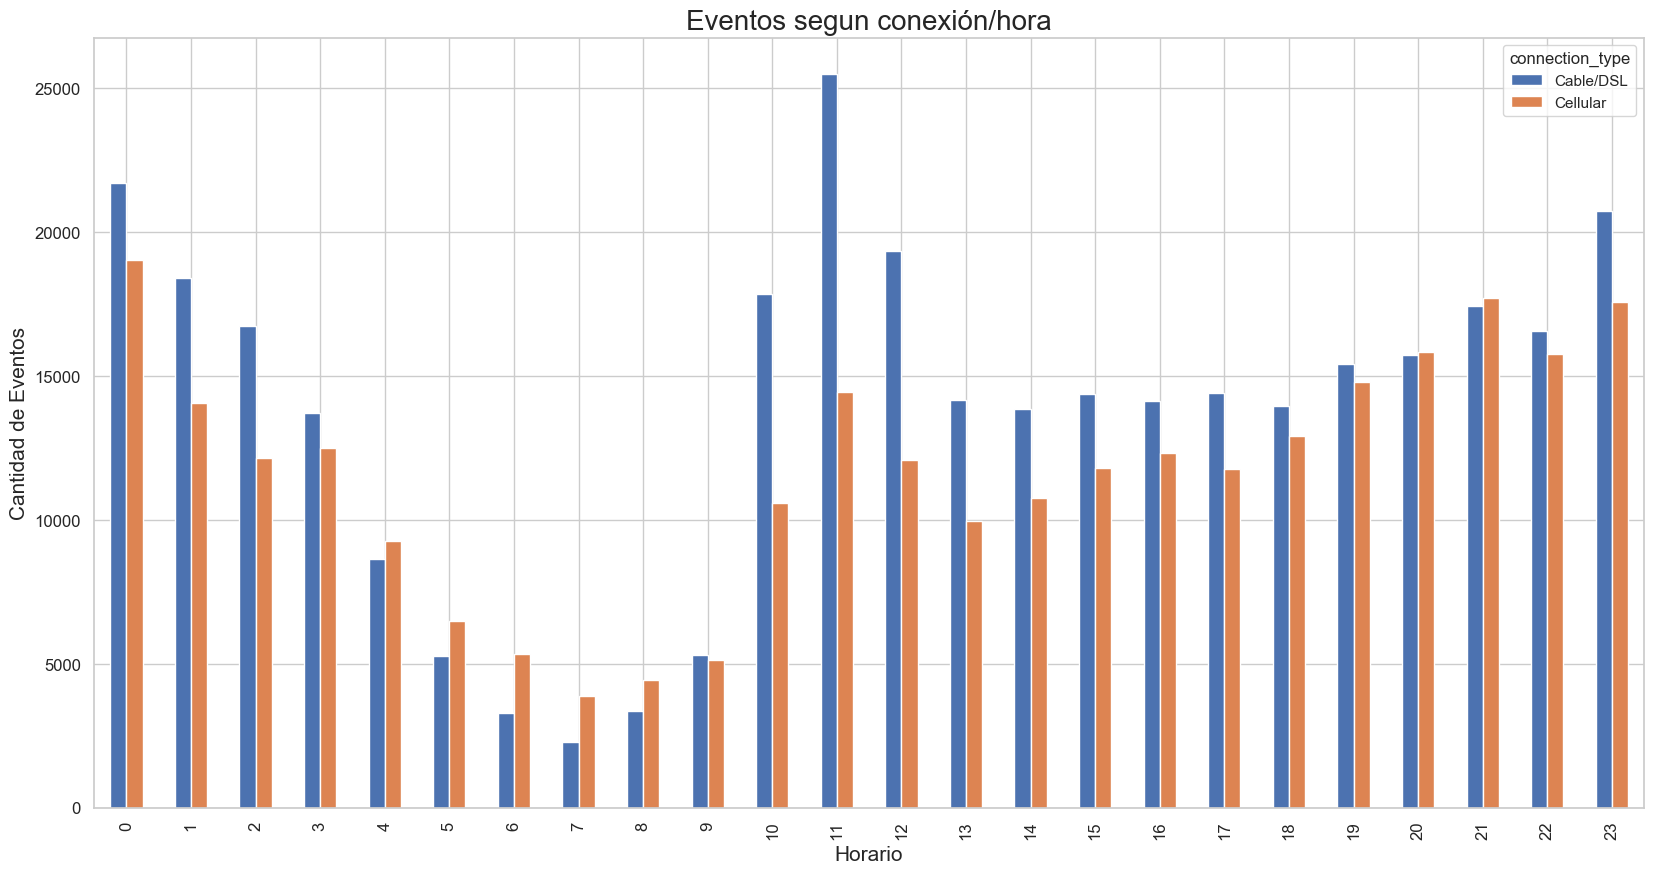

In [65]:
events.loc[(events['connection_type']=='Cable/DSL')|(events['connection_type']=='Cellular')].groupby(['hour','connection_type'])['hour'].count().unstack().plot(kind='bar',figsize=(20,10),fontsize=12)
plt.title('Eventos segun conexión/hora',size=20)
plt.ylabel("Cantidad de Eventos", size=15)
plt.xlabel("Horario", size=15)
plt.show()

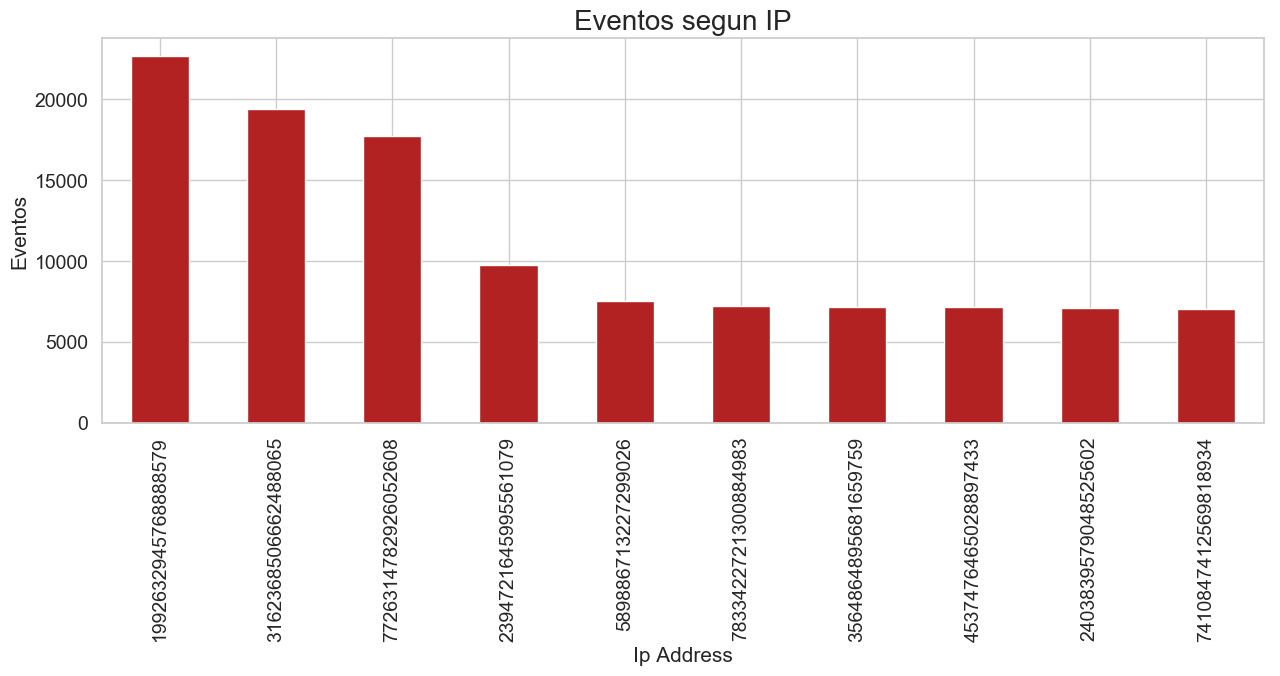

In [58]:
events['ip_address'].value_counts(sort=True).head(10).plot(kind='bar',figsize=(15,5),fontsize=14,rot=90,color='firebrick')
plt.title('Eventos segun IP', size=20)
plt.ylabel("Eventos", size=15)
plt.xlabel("Ip Address", size=15)
plt.show()

#### 6 - Tiempo entre eventos consecutivos para un mismo dispositivo

In [59]:
def agruparSegunTiempo(x):
    if (x < 10):
        return 'Menos de 10 minutos'
    elif (x < 30):
        return 'Entre 10 y 30 minutos'
    elif (x < 60):
        return 'Entre 30 y 60 minutos'
    elif (x < 300):
        return 'Entre 1 y 5 horas'
    elif (x < 600):
        return 'Entre 5 y 10 horas'
    elif (x < 1440):
        return 'Entre 10 y 24 horas'
    elif (x < 4320):
        return 'Entre 1 y 3 días'
    elif (x < 8640):
        return 'Entre 3 y 6 días'
    else:
        return 'Más de 6 días'
    
events_time['period'] = events_time['total_minutes'].apply(lambda x: agruparSegunTiempo(x))

In [60]:
events_time.head()

,ref_hash,date,afterward_date,time_between_dates,total_minutes,period
898266,8794361877529011410,2019-03-05 00:00:00.255,2019-03-05 00:02:51.425,00:02:51.170000,2.852833,Menos de 10 minutos
1449237,8104775547813780543,2019-03-05 00:00:00.278,2019-03-05 00:00:09.181,00:00:08.903000,0.148383,Menos de 10 minutos
1424564,5721669786407132221,2019-03-05 00:00:00.987,2019-03-05 19:20:15.657,19:20:14.670000,1160.244500,Entre 10 y 24 horas
1684095,6714403515890990923,2019-03-05 00:00:01.778,2019-03-05 00:00:47.185,00:00:45.407000,0.756783,Menos de 10 minutos
2122136,4989740889492445687,2019-03-05 00:00:02.136,2019-03-05 00:00:40.683,00:00:38.547000,0.642450,Menos de 10 minutos


In [61]:
events_time['period'].value_counts()

Menos de 10 minutos      1718879
Entre 1 y 5 horas         121288
Entre 10 y 30 minutos     120467
Entre 10 y 24 horas        95335
Entre 1 y 3 días           89447
Entre 30 y 60 minutos      63549
Entre 5 y 10 horas         52633
Entre 3 y 6 días           32055
Más de 6 días               4721
Name: period, dtype: int64

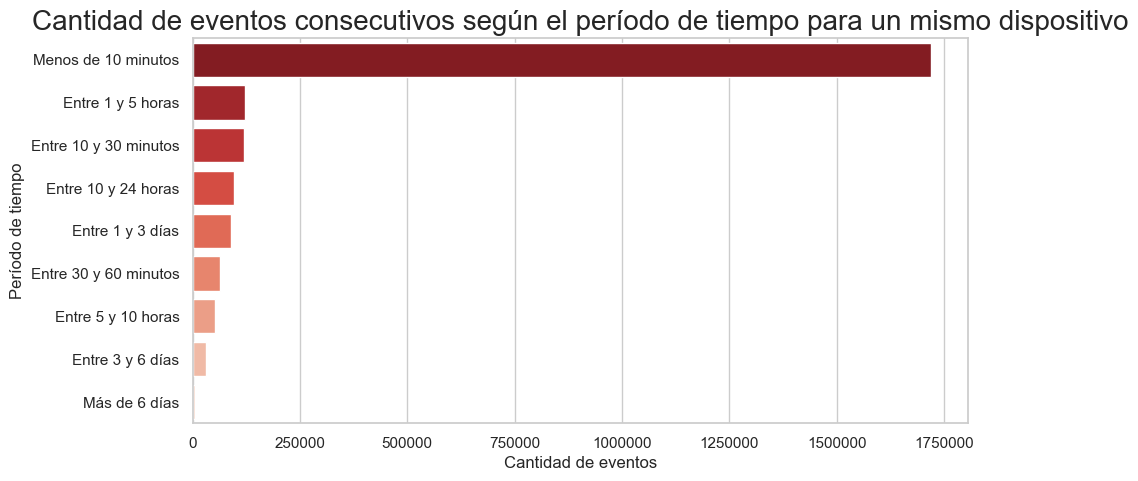

In [63]:
events_time_per_period = events_time['period'].value_counts()

g = sns.barplot(y=events_time_per_period.index, x=events_time_per_period.values, \
                palette=sns.color_palette("Reds_r", 10), orient='h');
g.set_title('Cantidad de eventos consecutivos según el período de tiempo para un mismo dispositivo', fontsize=20);
g.set_xlabel('Cantidad de eventos');
g.set_ylabel('Período de tiempo');

A partir de éste gráfico podemos decir:
+ La mayor cantidad de eventos generado por un mismo dispotivo se da cada menos de 10 minutos, con una cantidad bastante considerable. Esto nos puede pasar por dos opciones principalmente: 
    - Que esta clara diferencia sea por aquellos usuarios en los generan continuamente.
    - O que los usuarios utilizan el dispositivo ésta cantidad de tiempo seguida, también se puede ver que los siguientes valores son ***entre 10 y 30 minutos*** y luego ***entre 1 y 5 horas***.
+ Podemos ver que a medida que pasan los días, la cantidad de eventos, disminuyen fuertemente.
+ También nos llamó la atención la poca cantidad de evetos (comparados con los otros grupos), que se generan ***entre 30 y 60 minutos***